In [1]:
import sklearn


In [2]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

In [3]:
import numpy as np
import matplotlib.pyplot as plt

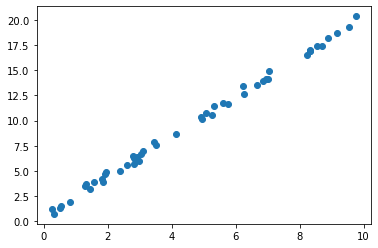

In [4]:
x = 10*np.random.rand(50)
y=2*x+np.random.rand(50)
plt.scatter(x,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [13]:
X = x[:,np.newaxis]
X

array([[5.32253682],
       [3.44055248],
       [3.11834484],
       [1.90702474],
       [8.68434236],
       [1.28302955],
       [3.51996876],
       [0.25434281],
       [2.82489966],
       [7.05078043],
       [5.7518638 ],
       [9.76638724],
       [6.24518068],
       [5.05982784],
       [4.92810085],
       [8.32934379],
       [6.86609112],
       [4.13222644],
       [4.96094195],
       [8.89510409],
       [8.22743754],
       [9.53218329],
       [1.46084122],
       [2.92376909],
       [1.85502429],
       [0.80927567],
       [3.03029217],
       [8.55242678],
       [2.37179688],
       [7.00119674],
       [1.33006422],
       [9.16690553],
       [2.59132704],
       [5.60746672],
       [6.25933325],
       [1.56814877],
       [5.25602274],
       [1.93900892],
       [2.99404476],
       [0.49649234],
       [6.95146856],
       [6.65520535],
       [8.32692184],
       [1.83206105],
       [2.80932566],
       [0.31672105],
       [0.52913404],
       [8.329

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
model.coef_

array([1.97509935])

In [16]:
model.intercept_

0.5659835883624389

In [19]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

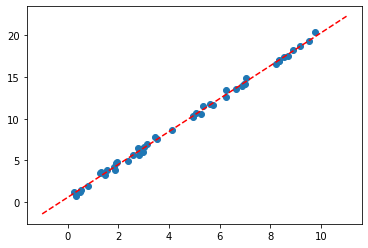

In [24]:
plt.scatter(x,y)
plt.plot(xfit, yfit, '--r');

In [28]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [31]:
x, y = diabetes['data'], diabetes['target']

In [41]:
print(diabetes.DESCR)
print(diabetes.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [44]:
print(diabetes.data_filename)
print(diabetes.target_filename)

D:\Program\Anaconda\envs\myplace\lib\site-packages\sklearn\datasets\data\diabetes_data.csv.gz
D:\Program\Anaconda\envs\myplace\lib\site-packages\sklearn\datasets\data\diabetes_target.csv.gz


In [45]:
from sklearn.model_selection import train_test_split


In [46]:
train_x, test_x, train_y, test_y = train_test_split(diabetes.data, diabetes.target, test_size=0.3)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((309, 10), (133, 10), (309,), (133,))

In [52]:
model = LinearRegression()
model.fit(train_x, train_y)
print('학습 데이터 점수 : {}'.format(model.score(train_x, train_y)))
print('평가 데이터 점수 : {}'.format(model.score(test_x, test_y)))

학습 데이터 점수 : 0.5475592261534987
평가 데이터 점수 : 0.44339646167793545


In [53]:
pred_y = model.predict(test_x)

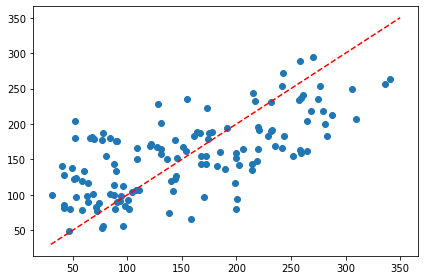

In [58]:
plt.scatter(test_y, pred_y)
plt.plot([30,350],[30,350],'--r')
plt.tight_layout()

In [61]:
from sklearn.model_selection import cross_val_score, cross_validate
scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)
print('교차 검증 정확도 :{}'.format(scores))
print('교차 검증 정확도 :{} +/- {}'.format(np.mean(scores), np.std(scores)))

교차 검증 정확도 :[0.42955643 0.52259828 0.4826784  0.42650827 0.55024923]
교차 검증 정확도 :0.4823181221114938 +/- 0.04926619776563211


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import pandas as pd

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=10)
result = gs.fit(diabetes.data, diabetes.target)

print('최적 점수 : {}'.format(result.best_score_))
print('최적 파라미터 : {}'.format(result.best_params_))
print('최적 estimator : {}'.format(result.best_estimator_))

pd.DataFrame(result.cv_results_)

최적 점수 : 0.4633240541517593
최적 파라미터 : {'alpha': 0.1}
최적 estimator : Ridge(alpha=0.1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000400,0.000490,0.000565,0.000473,0.001,{'alpha': 0.001},0.554415,0.233686,0.356799,0.620259,0.267033,0.619397,0.419907,0.433019,0.433431,0.684984,0.462293,0.145848,3
1,0.000500,0.000500,0.000100,0.000300,0.01,{'alpha': 0.01},0.546297,0.244132,0.368901,0.613732,0.271717,0.623089,0.426074,0.424759,0.429484,0.680912,0.462910,0.141446,2
2,0.000336,0.000430,0.000215,0.000396,0.1,{'alpha': 0.1},0.526550,0.244987,0.383530,0.606594,0.286094,0.618033,0.431230,0.441788,0.431968,0.662466,0.463324,0.132681,1
3,0.000400,0.000506,0.000200,0.000400,1,{'alpha': 1},0.421593,0.168442,0.358004,0.512608,0.284928,0.514264,0.388246,0.484448,0.396502,0.525132,0.405417,0.108385,4
4,0.000300,0.000459,0.000200,0.000400,10,{'alpha': 10},0.159386,-0.081177,0.152190,0.165690,0.119349,0.186933,0.158147,0.203748,0.153627,0.189440,0.140733,0.077298,5
5,0.000400,0.000490,0.000100,0.000227,100,{'alpha': 100},0.012468,-0.234480,0.013522,-0.012820,0.004838,0.022647,0.022028,-0.009908,0.015589,0.026427,-0.013969,0.074561,6
6,0.000300,0.000459,0.000100,0.000300,1000,{'alpha': 1000},-0.009602,-0.258118,-0.007849,-0.038479,-0.012933,-0.000932,0.001768,-0.042679,-0.004652,0.002744,-0.037073,0.075191,7


In [70]:
import multiprocessing
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()

param_grid = [
    {
        'penalty': ['l1','l2'],
        'C':[3.5, 4.0, 3.5, 3.8, 2.5,2.4]
    }
]
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())
result = gs.fit(iris.data, iris.target)

print('최적 점수 : {}'.format(result.best_score_))
print('최적 파라미터 : {}'.format(result.best_params_))
print('최적 estimator : {}'.format(result.best_estimator_))

pd.DataFrame(result.cv_results_)

최적 점수 : 0.9800000000000001
최적 파라미터 : {'C': 3.5, 'penalty': 'l2'}
최적 estimator : LogisticRegression(C=3.5)


D:\Program\Anaconda\envs\myplace\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [ nan 0.98  nan 0.98  nan 0.98  nan 0.98  nan 0.98  nan 0.98]
  category=UserWarning
D:\Program\Anaconda\envs\myplace\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000100,0.000300,0.0000,0.000000,3.5,l1,"{'C': 3.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.023358,0.001184,0.0000,0.000000,3.5,l2,"{'C': 3.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.0,0.933333,1.0,1.0,1.0,0.98,0.030551,1
2,0.000200,0.000400,0.0000,0.000000,4.0,l1,"{'C': 4.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,0.022213,0.002793,0.0004,0.000490,4.0,l2,"{'C': 4.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.0,0.933333,1.0,1.0,1.0,0.98,0.030551,1
4,0.000000,0.000000,0.0000,0.000000,3.5,l1,"{'C': 3.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.025461,0.001614,0.0005,0.000500,3.5,l2,"{'C': 3.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.0,0.933333,1.0,1.0,1.0,0.98,0.030551,1
6,0.000000,0.000000,0.0000,0.000000,3.8,l1,"{'C': 3.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.025208,0.000760,0.0003,0.000458,3.8,l2,"{'C': 3.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.0,0.933333,1.0,1.0,1.0,0.98,0.030551,1
8,0.000100,0.000300,0.0000,0.000000,2.5,l1,"{'C': 2.5, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.024214,0.001455,0.0002,0.000400,2.5,l2,"{'C': 2.5, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.0,0.933333,1.0,1.0,1.0,0.98,0.030551,1


In [71]:
def ispal(s):
    strs = []
    for char in s:
        if char.isalnum():
            strs.append(char.lower())

    while len(strs)>1:
        if strs.pop(0) != strs.pop():
            return False
    return True


In [72]:
ispal('A man, a plan, a canal: Panama')


True

In [73]:
ispal('race a car')

False

In [74]:
aa = {"segmentation": {"counts": [8214,6,629,17,2,6,614,28,611,29,610,31,609,31,609,32,608,32,608,32,608,31,609,31,610,29,612,27,615,16,3,4,620,11,35186,6,633,9,630,11,628,14,626,14,626,15,625,15,625,16,624,16,624,16,625,14,627,13,628,11,631,8,634,4,40318,5,629,14,624,17,622,19,620,20,619,22,617,23,617,23,617,22,618,22,618,21,619,7,1,4,3,4,621,6,3,1,631,3,638,1,133135,5,633,8,631,10,630,10,630,11,629,11,629,11,629,11,629,11,629,11,629,10,631,9,632,7,634,4,99294],"size": [640,549]},"area": 962,"iscrowd": 1,"image_id": 374545,"bbox": [12,524,381,33],"category_id": 1,"id": 900100374545}



In [75]:
aa

{'segmentation': {'counts': [8214,
   6,
   629,
   17,
   2,
   6,
   614,
   28,
   611,
   29,
   610,
   31,
   609,
   31,
   609,
   32,
   608,
   32,
   608,
   32,
   608,
   31,
   609,
   31,
   610,
   29,
   612,
   27,
   615,
   16,
   3,
   4,
   620,
   11,
   35186,
   6,
   633,
   9,
   630,
   11,
   628,
   14,
   626,
   14,
   626,
   15,
   625,
   15,
   625,
   16,
   624,
   16,
   624,
   16,
   625,
   14,
   627,
   13,
   628,
   11,
   631,
   8,
   634,
   4,
   40318,
   5,
   629,
   14,
   624,
   17,
   622,
   19,
   620,
   20,
   619,
   22,
   617,
   23,
   617,
   23,
   617,
   22,
   618,
   22,
   618,
   21,
   619,
   7,
   1,
   4,
   3,
   4,
   621,
   6,
   3,
   1,
   631,
   3,
   638,
   1,
   133135,
   5,
   633,
   8,
   631,
   10,
   630,
   10,
   630,
   11,
   629,
   11,
   629,
   11,
   629,
   11,
   629,
   11,
   629,
   11,
   629,
   10,
   631,
   9,
   632,
   7,
   634,
   4,
   99294],
  'size': [640, 549]},
 '

In [93]:
import json
import numpy as np

annotation = {
        "segmentation": [],
        "area": aa['area'],
        "iscrowd": 0,
        "image_id": 123,
        "bbox": aa['bbox'],
        "category_id": 1,
        "id": aa['id']
    }

for contour in aa['segmentation']['counts']:
    contour = np.flip(contour, axis=1)
    segmentation = contour.ravel().tolist()
    annotation["segmentation"].append(segmentation)

print(json.dumps(annotation, indent=4))

AxisError: axis 0 is out of bounds for array of dimension 0

In [94]:
def binary_mask_to_rle(binary_mask):
    rle = {'counts': [], 'size': list(binary_mask.shape)}
    counts = rle.get('counts')
    for i, (value, elements) in enumerate(groupby(binary_mask.ravel(order='F'))):
        if i == 0 and value == 1:
            counts.append(0)
        counts.append(len(list(elements)))
    return rle

In [89]:
import json
import numpy as np
from pycocotools import mask
from skimage import measure

ground_truth_binary_mask = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  0,   0,   0,   0,   0,   1,   1,   1,   0,   0],
                                     [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)

fortran_ground_truth_binary_mask = np.asfortranarray(ground_truth_binary_mask)
encoded_ground_truth = mask.encode(fortran_ground_truth_binary_mask)
ground_truth_area = mask.area(encoded_ground_truth)
ground_truth_bounding_box = mask.toBbox(encoded_ground_truth)
contours = measure.find_contours(ground_truth_binary_mask, 0.5)



ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [98]:
binary_mask_to_rle(aa['segmentation']['counts'])

AttributeError: 'list' object has no attribute 'shape'

In [99]:
aa.keys()



dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [102]:
aa['area']

962